# Predicting Stock Prices
Importing libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import csv

Getting data from csv file.

In [2]:
def get_data(filename):
    dates = []
    prices = []
    with open(filename, 'r') as file:
        csvReader = csv.reader(file)
        next(csvReader)
        next(csvReader)
        for row in csvReader:
            dates.append(int(row[0].split('/')[2]))
            prices.append(float(row[1]))
    dates = np.reshape(dates, (len(dates), 1))
    return dates[13:32], prices[13:32]

dates, prices = get_data('data/appleHistoricalQuotes.csv')

for date, price in zip(dates, prices):
    print(date, price)

[31] 157.74
[28] 156.23
[27] 156.15
[26] 157.17
[24] 146.83
[21] 150.73
[20] 156.83
[19] 160.89
[18] 166.07
[17] 163.94
[14] 165.48
[13] 170.95
[12] 169.1
[11] 168.63
[10] 169.6
[7] 168.49
[6] 174.72
[4] 176.69
[3] 184.82


Initializing models and defining training function.

In [3]:
model_names = ['Linear model', 'Polynomial model', 'RBF model']

models = [
    SVR(kernel='linear', C=1e3),
    SVR(kernel='poly', C=1e3, degree=2),
    SVR(kernel='rbf', C=1e3, gamma=0.1)]

def train_models(dates, prices, models, model_names):
    for model, name in zip(models, model_names):
        print('Training', name, '...')
        model.fit(dates, prices)
        print(name, 'trained.')
    return

train_models(dates, prices, models, model_names)

Training Linear model ...
Linear model trained.
Training Polynomial model ...
Polynomial model trained.
Training RBF model ...
RBF model trained.


Function for predicting prices and plot.

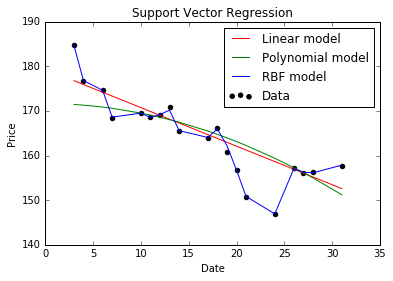

In [4]:
def plot_predictions(dates, prices, models, model_names, colors):
    plt.scatter(dates, prices, color='black', label='Data')
    for model, name, color in zip(models, model_names, colors):
        plt.plot(dates, model.predict(dates), color=color, label=name)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    return

colors = ['red', 'green', 'blue']

plot_predictions(dates, prices, models, model_names, colors)